In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [59]:
y_feature_spec_info = pd.read_csv("./y_feature_spec_info.csv")
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

(94, 71)
Y_01 의 비정상 데이터 1476
(252, 71)
Y_02 의 비정상 데이터 558
(261, 71)
Y_03 의 비정상 데이터 464
(346, 71)
Y_04 의 비정상 데이터 500
(63, 71)
Y_05 의 비정상 데이터 91
(10, 71)
Y_06 의 비정상 데이터 10
(851, 71)
Y_07 의 비정상 데이터 1822
(18, 71)
Y_08 의 비정상 데이터 19
(17, 71)
Y_09 의 비정상 데이터 19
(5, 71)
Y_10 의 비정상 데이터 5
(0, 71)
Y_11 의 비정상 데이터 3
(13, 71)
Y_12 의 비정상 데이터 16
(12, 71)
Y_13 의 비정상 데이터 15
(12, 71)
Y_14 의 비정상 데이터 13


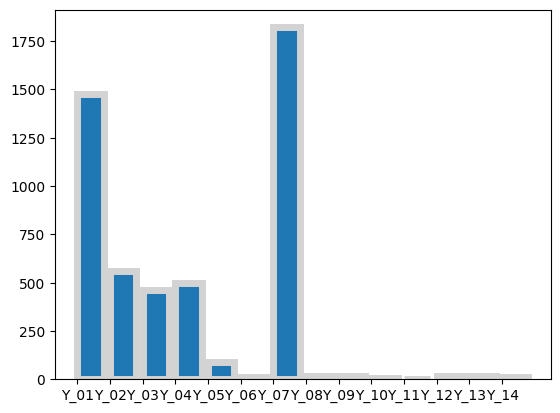

In [65]:
#메타데이터 기준 정상치 데이터 필터링 하기
count_Y_abnormal_data = []
train_abnormal = train
for i in range(0,14):
    min_up =(train['Y_%02d'%(i+1)] >= y_feature_spec_info["최소"][i])
    max_down =(train['Y_%02d'%(i+1)] <= y_feature_spec_info["최대"][i])
    
    min_down =(train['Y_%02d'%(i+1)] < y_feature_spec_info["최소"][i])
    max_up =(train['Y_%02d'%(i+1)] > y_feature_spec_info["최대"][i])

    # train_abnormal = train[(min_down) | (max_up)]
    train_abnormal = train[(min_down)]
    train_normal = train[(min_up) & (max_down)]
    print(train_abnormal.shape)
    train_normal.to_csv("./normal_data/Y_%02d.csv"%(i+1),index=False)
    train_abnormal.to_csv("./abnormal_data/Y_%02d.csv"%(i+1),index=False)
    abnormal = train.shape[0] - train[(min_up & max_down)].shape[0]
    print('Y_%02d'%(i+1),"의 비정상 데이터",abnormal)
    count_Y_abnormal_data.append(abnormal)

plt.bar(y_feature_spec_info["Feature"].tolist(),count_Y_abnormal_data, align='edge', edgecolor='lightgray',
        linewidth=5)


plt.show()


# Y별 정확도

In [73]:
# imbalanced-learn 패키지
from imblearn.over_sampling import SMOTE
for i in range(1,15):
    # Y_01 정상 비정상을 활용한 정상 비정상 매핑
    normal_data = pd.read_csv("./normal_data/Y_%02d.csv"%i)
    abnormal_data = pd.read_csv("./abnormal_data/Y_%02d.csv"%i)
    normal_data["target"] = 1
    abnormal_data["target"] = 0
    new_data_Y_01 = pd.concat([normal_data, abnormal_data], ignore_index = True)

    import pandas as pd
    from sklearn.model_selection import train_test_split


    train_df = new_data_Y_01.filter(regex="X")

    # train, test 데이터셋 분리
    X_train, X_test, y_train, y_test = train_test_split(train_df, new_data_Y_01["target"], 
                                                        test_size = 0.25, random_state = 32)
    # SMOTE 객체 생성
    smote = SMOTE(random_state=42)

    # 샘플링
    X_train, y_train = smote.fit_resample(X_train, y_train)
    from xgboost import XGBClassifier

    # 모델 선언 예시
    model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=2, random_state = 32)
    model.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score

    y_pred = model.predict(X_test) # 예측 라벨(0과 1로 예측)
    from sklearn.metrics import confusion_matrix
    # cf = confusion_matrix(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    print(cf)
    # 예측 라벨과 실제 라벨 사이의 정확도 측정
    print("Y_%02d 정상 비정상 예측"%i,accuracy_score(y_pred, y_test)*100,"%",sep=",") # 0.7847533632286996

[[  23    6]
 [ 563 8965]]
Y_01 정상 비정상 예측,94.04624882285236,%
[[  13   49]
 [ 521 9243]]
Y_02 정상 비정상 예측,94.1990637085284,%
[[   4   70]
 [ 168 9609]]
Y_03 정상 비정상 예측,97.5840016242006,%
[[   7   81]
 [ 338 9438]]
Y_04 정상 비정상 예측,95.7522303325223,%
[[   2   18]
 [ 547 9328]]
Y_05 정상 비정상 예측,94.2900454775139,%
[[   0    2]
 [  56 9844]]
Y_06 정상 비정상 예측,99.41425974550596,%
[[  10  205]
 [ 201 9243]]
Y_07 정상 비정상 예측,95.79666632156538,%
[[   0    4]
 [ 387 9511]]
Y_08 정상 비정상 예측,96.05130276711775,%
[[   0    5]
 [ 304 9593]]
Y_09 정상 비정상 예측,96.87941829933347,%


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 6

(1382, 71)
Y_01 의 비정상 데이터 1476
(306, 71)
Y_02 의 비정상 데이터 558
(203, 71)
Y_03 의 비정상 데이터 464
(154, 71)
Y_04 의 비정상 데이터 500
(28, 71)
Y_05 의 비정상 데이터 91
(0, 71)
Y_06 의 비정상 데이터 10
(971, 71)
Y_07 의 비정상 데이터 1822
(1, 71)
Y_08 의 비정상 데이터 19
(2, 71)
Y_09 의 비정상 데이터 19
(0, 71)
Y_10 의 비정상 데이터 5
(3, 71)
Y_11 의 비정상 데이터 3
(3, 71)
Y_12 의 비정상 데이터 16
(3, 71)
Y_13 의 비정상 데이터 15
(1, 71)
Y_14 의 비정상 데이터 13


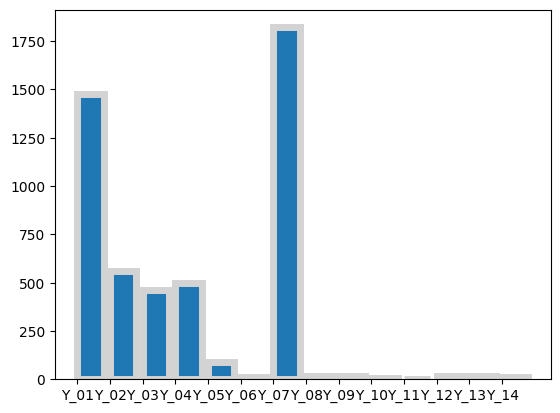

In [75]:
#메타데이터 기준 정상치 데이터 필터링 하기
count_Y_abnormal_data = []
train_abnormal = train
for i in range(0,14):
    min_up =(train['Y_%02d'%(i+1)] >= y_feature_spec_info["최소"][i])
    max_down =(train['Y_%02d'%(i+1)] <= y_feature_spec_info["최대"][i])
    
    min_down =(train['Y_%02d'%(i+1)] < y_feature_spec_info["최소"][i])
    max_up =(train['Y_%02d'%(i+1)] > y_feature_spec_info["최대"][i])

    train_abnormal = train[ (max_up)]

    train_normal = train[(min_up) & (max_down)]
    print(train_abnormal.shape)
    train_normal.to_csv("./normal_data/Y_%02d.csv"%(i+1),index=False)
    train_abnormal.to_csv("./abnormal_data/Y_%02d.csv"%(i+1),index=False)
    abnormal = train.shape[0] - train[(min_up & max_down)].shape[0]
    print('Y_%02d'%(i+1),"의 비정상 데이터",abnormal)
    count_Y_abnormal_data.append(abnormal)

plt.bar(y_feature_spec_info["Feature"].tolist(),count_Y_abnormal_data, align='edge', edgecolor='lightgray',
        linewidth=5)


plt.show()


In [76]:


# imbalanced-learn 패키지
from imblearn.over_sampling import SMOTE
for i in range(1,15):
    # Y_01 정상 비정상을 활용한 정상 비정상 매핑
    normal_data = pd.read_csv("./normal_data/Y_%02d.csv"%i)
    abnormal_data = pd.read_csv("./abnormal_data/Y_%02d.csv"%i)
    normal_data["target"] = 1
    abnormal_data["target"] = 0
    new_data_Y_01 = pd.concat([normal_data, abnormal_data], ignore_index = True)

    import pandas as pd
    from sklearn.model_selection import train_test_split


    train_df = new_data_Y_01.filter(regex="X")

    # train, test 데이터셋 분리
    X_train, X_test, y_train, y_test = train_test_split(train_df, new_data_Y_01["target"], 
                                                        test_size = 0.25, random_state = 32)
    # SMOTE 객체 생성
    smote = SMOTE(random_state=42)

    # 샘플링
    X_train, y_train = smote.fit_resample(X_train, y_train)
    from xgboost import XGBClassifier

    # 모델 선언 예시
    model = XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=2, random_state = 32)
    model.fit(X_train, y_train)
    from sklearn.metrics import accuracy_score

    y_pred = model.predict(X_test) # 예측 라벨(0과 1로 예측)
    from sklearn.metrics import confusion_matrix
    # cf = confusion_matrix(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    print(cf)
    # 예측 라벨과 실제 라벨 사이의 정확도 측정
    print("Y_%02d 정상 비정상 예측"%i,accuracy_score(y_pred, y_test)*100,"%",sep=",") # 0.7847533632286996

[[   0  324]
 [  28 9527]]
Y_01 정상 비정상 예측,96.43688632452677,%
[[   3   86]
 [ 161 9589]]
Y_02 정상 비정상 예측,97.4895822746214,%
[[   3   51]
 [ 338 9445]]
Y_03 정상 비정상 예측,96.04554234014435,%
[[   3   36]
 [ 617 9160]]
Y_04 정상 비정상 예측,93.34759576202119,%
[[   0    8]
 [ 650 9228]]
Y_05 정상 비정상 예측,93.34412300222536,%


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead